과일 사진을 받아서 가장 많이 받은 과일을 선정하고자 한다. 또한 1위로 선정된 과일 사진을 보낸 사람 중 몇 명을 뽑아 당첨자로 선정한다.  
  
사진을 사람이 하나씩 분류하기는 어렵다. 더 나아가서 미리 과일 분류기를 훈련하기에는 어떤 과일 사진을 받을지 알 수 없어 곤란하다. 사진에 대한 정답(타깃)을 알지 못하는데 어떻게 사진을 종류대로 모을 수 있을까?

### 타깃을 모르는 비지도 학습  
타깃이 없을 때 사용하는 머신러닝 알고리즘이 있다. **비지도 학습(unsupervised learning)** 이다. 사람이 가르쳐 주지 않아도 데이터에 있는 무언가를 학습하는 것이다. 어떻게 무엇을 학습해야 할까?  
  
*사진의 픽셀값을 모두 평균을 내면 비슷한 과일끼리 모일까?*  
일단 데이터를 준비하고 픽셀값을 이용해서 사진을 분류해 보자.

#### 과일 사진 데이터 준비하기  
준비한 과일 사진 데이터는 사과, 바나나, 파인애플을 담고 있는 흑백 사진이다. 이 데이터는 넘파이 배열의 기본 저장 포맷인 npy 파일로 저장되어 있다. 넘파이에서 이 파일을 읽으려면 먼저 다운로드 해야한다. 다음 명령어를 실행해 파일을 다운로드 하자

In [1]:
""" 
이미 다운받은 파일이 있으니 재 다운로드를 막기 위해 주석처리
import wget
url = 'https://bit.ly/fruits_300_data'
wget.download(url, out = 'fruits_300.npy') ### wget.download 안에 out = '다른이름으로 저장할 파일 이름' 입력
"""

" \n이미 다운받은 파일이 있으니 재 다운로드를 막기 위해 주석처리\nimport wget\nurl = 'https://bit.ly/fruits_300_data'\nwget.download(url, out = 'fruits_300.npy') ### wget.download 안에 out = '다른이름으로 저장할 파일 이름' 입력\n"

다운로드 한 파일에서 데이터를 로드해보자. 먼저 넘파이와 맷플롯립 패키지를 업로드한다.

In [3]:
import numpy as np
import matplotlib.pyplot as plt

넘파이에서 npy 파일을 로드하는 방법은 간단하다. load() 메서드에 파일 이름을 전달하면 된다.

In [4]:
fruits = np.load('fruits_300.npy')

fruits는 넘파이 배열이고 fruits_300.npy 파일에 들어 있는 모든 데이터를 담고 있다. fruits 배열의 크기를 확인해 보자.

In [5]:
print(fruits.shape)

(300, 100, 100)


이 배열의 첫 번째 차원(300)은 샘플의 개수를 나타내고, 두 번째 차원(100)은 이미지 높이, 세 번째 차원(100)은 이미지 너비이다. 이미지 크기는 100 x 100이다. 각 픽셀은 넘파이 배열의 원소 하나에 대응한다. 즉 배열의 크기가 100 x 100이다.  
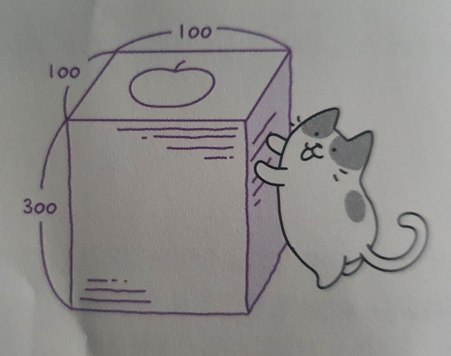  
  
첫 번째 이미지의 첫 번째 행을 출력해 보자. 3차원 배열이기 때문에 처음 2개의 인덱스를 0으로 지정하고 마지막 인덱스는 지정하지 않거나 슬라이싱 연산자를 쓰면 첫 번째 이미지의 첫 번째 행을 모두 선택할 수 있다.

In [6]:
print(fruits[0,0, :]) # 첫번째 행의 모든 열 값을 출력하는 의미와 같다.

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


첫 번째 행에 있는 픽셀 100개에 들어 있는 값을 출력했다. 이 넘파이 배열은 흑백 사진을 담고 있으므로 0 ~ 255 까지의 정숫값을 가진다. 이 정숫값에 대해 더 알아보기 전에 첫 번째 이미지를 그림으로 그려서 이 숫자와 비교해 보자.  
  
맷플롯립 imshow() 함수를 사용하면 넘파이 배열로 지정된 이미지를 쉽게 그릴 수 있다. 흑백 이미지이므로 cmap 매개변수를 'gray'로 지정한다.

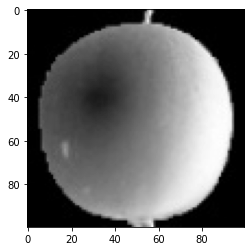

In [7]:
plt.imshow(fruits[0], cmap = 'gray') # fruits의 첫 번째 인덱스만 0으로 지정했으므로 첫 번째 이미지의 행열값을 모두 그리게 된다.
plt.show()

사과같이 보인다. 다음의 그림처럼 첫 번째 행이 위에서 출력한 배열 값에 해당한다. 0에 가까울수록 검게 나타나고 높은 값은 밝게 표시된다.  
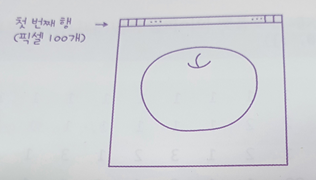  
보통 흑백 샘플 이미지는 바탕이 밝고 물체가 짙은 색이다. 그런데 왜 이렇게 보일까? 사실 이 흑백 이미지는 사진으로 찍은 이미지를 넘파이 배열로 변환할 때 반전시킨 것이다. 사진의 흰 바탕(높은 값)은 검은색(낮은 값)으로 만들고 실제 사과가 있어 짙은 부분(낮은 값)은 밝은색(높은 값)으로 바꾸었다. 다음 그림과 같다.  
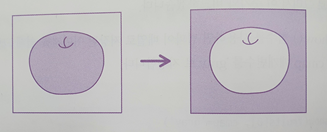  
  
왜 이렇게 바꾸었을까? 관심의 대상은 바탕이 아니라 사과(물체)이기 때문이다. 흰색 바탕은 우리에게 중요하지 않지만 컴퓨터는 255에 가까운 바탕에 집중할 것이다. 따라서 바탕을 검게 만들고 사진에 짙게 나온 사과를 밝은색으로 만들었다.

#### 컴퓨터는 왜 255에 가까운 바탕에 집중하나?  
알고리즘이 어떤 출력을 만들기 위해 곱셈, 덧셈을 한다. 픽셀값이 0이면 출력도 0이 되어 의미가 없다. 픽셀값이 높으면 출력값도 커지기 때문에 의미를 부여하기 좋다.

우리가 보는 것과 컴퓨터가 처리하는 방식이 다르기 때문에 종종 흑백 이미지를 이렇게 반전하여 사용한다. 관심 대상의 영역을 높은 값으로 바꾸었지만 맷플롯립으로 출력할 때 바탕이 검게 나오므로 보기에는 좋지 않다. cmap 매개변수를 'gray_r'로 지정하면 다시 반전하여 우리 눈에 보기 좋게 출력한다.

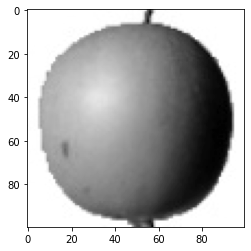

In [8]:
plt.imshow(fruits[0], cmap = 'gray_r')
plt.show()

이 그림에서 밝은 부분이 0에 가깝고 짙은 부분이 255에 가까운 값이다.  
  
이 데이터에는 사과, 바나나, 파인애플이 각각 100개씩 들어 있다. 바나나와 파인애플 이미지도 출력해 보자.

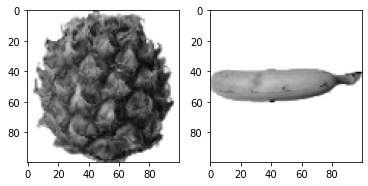

In [9]:
fig, axs = plt.subplots(1,2)
axs[0].imshow(fruits[100], cmap = 'gray_r')
axs[1].imshow(fruits[200], cmap = 'gray_r')
plt.show()

그림이 나란히 출력되었다. 맷플롯립의 subplots() 함수를 사용하면 여러 개의 그래프를 배열처럼 쌓을 수 있게 도와준다. subplots() 함수의 두 매개변수는 그래프를 쌓을 행과 열을 지정한다. 여기에서는 subplots(1,2)처럼 하나의 행과 두 개의 열을 지정했다.  
  
반환된 axs는 2개의 서브 그래프를 담고 있는 배열이다. axs[0]에 파인애플 이미지를, axs[1]에 바나나 이미지를 그렸다. 이 장에서 subplots()를 사용해 한 번에 여러 개의 이미지를 그려보겠다.  
  
샘플 데이터가 준비되었다. 이 데이터의 처음 100개는 사과, 그다음 100개는 파인애플, 마지막 100개는 바나나이다. 각 과일 사진의 평균을 내서 차이를 확인해 보자.

### 픽셀값 분석하기  
편의성을 위해 fruits 데이터를 사과, 파인애플, 바나나로 각각 나누어 보자. 넘파이 배열을 나눌 때 100 x 100 이미지를 펼쳐서 길이가 10,000인 1차원 배열로 만들어 보자. 이렇게 펼치면 이미지로 출력하기 어렵지만 배열을 계산할 때 편리하다.  
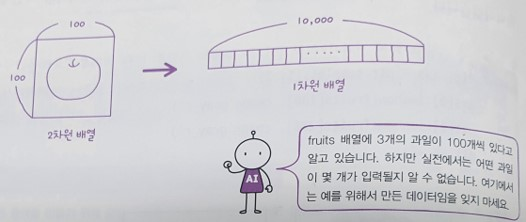  
  
fruits 배열에서 순서대로 100개씩 선택하기 위해 슬라이싱 연산자를 사용한다. 그다음 reshape() 메서드를 사용해 두 번째 차원(100)과 세 번째 차원(100)을 10,000으로 합친다. 첫 번째 차원을 -1로 지정하면 자동으로 남은 차원을 할당한다. 여기에서는 첫 번째 차원이 샘플의 개수이다.

In [10]:
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

이제 apple, pineapple, banana 배열의 크기는 (100, 10000)이다. 사과를 확인해 보자.

In [11]:
print(apple.shape)

(100, 10000)


이제 apple, pineapple, banana 배열에 들어 있는 샘플의 픽셀 평균값을 계산해 보자.  
넘파이 mean() 메서드를 사용한다. 샘플마다 픽셀의 평균값을 계산해야 하므로 mean() 메서드가 평균을 계산할 축을 지정해야 한다. axis = 0으로 하면 첫 번째 축인 행을 따라 계산한다. axis = 1로 지정하면 두 번째 축인 열을 따라 계산한다.  
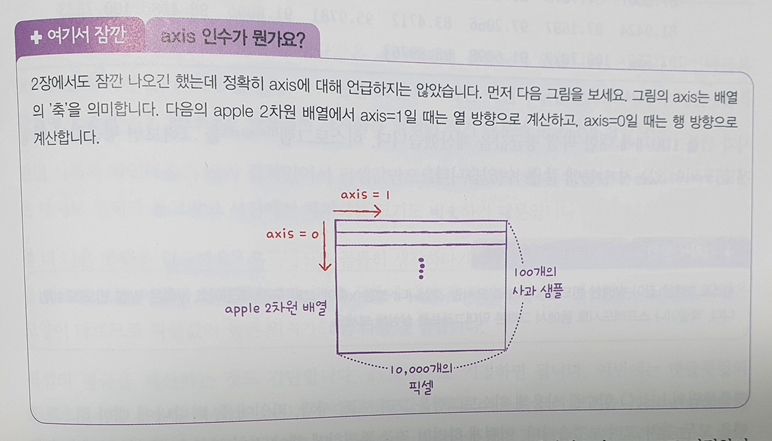  
  
필요한 것은 샘플의 평균값이고 샘플은 모두 가로로 값을 나열했기 때문에 axis = 1로 지정하여 평균을 계산한다.(앞서 2차원 배열을 1차원 배열로 치환했기 때문에 가능한 계산)  
평균을 계산하는 넘파이 np.mean() 함수를 사용해도 되지만 넘파이 배열은 이런 함수들을 메서드로도 제공한다.  
apple 배열의 mean() 메서드로 각 샘플의 픽셀 평균값을 계산해 보자.

In [12]:
print(apple.mean(axis = 1))

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


사과 샘플 100개에 대한 픽셀 평균값을 계산했다. 히스토그램(histogram)을 그려보면 평균값이 어떻게 분포되어 있는지 한눈에 잘 볼 수 있다.

**히스토그램?**  
히스토그램은 값이 발생한 빈도를 그래프로 표시한 것이다. 보통 x축이 값의 구간(계급)이고, y축은 발생 빈도(도수)이다. 엑셀이나 스프레드시트 등에서 그려본 막대그래프와 유사하다.

맷플롯립 hist() 함수를 사용해 히스토그램을 그려보자. 히스토그램을 모두 겹쳐 그려본다. 이때 조금 투명하게 해야 겹친 부분을 잘 볼 수 있다. alpha 매개변수를 1보다 작게 하면 투명도를 줄 수 있다. 또한 legend() 함수를 사용해 어떤 과일의 히스토그램인지 범례를 만들어보자.

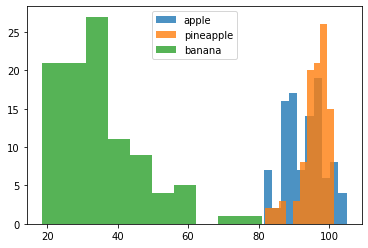

In [13]:
plt.hist(np.mean(apple, axis = 1), alpha = 0.8)
plt.hist(np.mean(pineapple, axis = 1), alpha = 0.8)
plt.hist(np.mean(banana, axis = 1), alpha = 0.8)
plt.legend(['apple', 'pineapple', 'banana'])
plt.show()

바나나 사진의 평균값은 40 아래에 집중되어 있다. 사과와 파인애플은 90 ~ 100사이에 많이 모여있다. 이 그림을 보면 바나나는 픽셀 평균값만으로 사과나 파인애플과 확실히 구분된다. 바나나는 사진에서 차지하는 영역이 작기 때문에 평균값이 작다.  
  
반면 사과와 파인애플은 많이 겹쳐있어서 픽셀값만으로는 구분하기 쉽지 않다. 사과나 파인애플은 대체로 형태가 동그랗고 사진에서 차지하는 크기도 비슷하기 때문이다.  
  
좀 더 나은 방법이 없을까? 샘플의 평균값이 아니라 픽셀별 평균값을 비교해보면 어떨지 알아 보자. 전체 샘플에 대해 각 픽셀의 평균을 계산하는 것이다. 세 과일은 모양이 다르므로 픽셀값이 높은 위치가 조금 다를 것 같다.

픽셀의 평균을 계산하는 것도 간단하다. axis = 0으로 지정하면 된다. 이번에는 맷플롯립의 bar() 함수를 사용해 픽셀 10,000개에 대한 평균값을 막대그래프로 그려 보자. subplots() 함수로 3개의 서브 그래프를 만들어 사과, 파인애플, 바나나에 대한 막대그래프를 그려 보자.

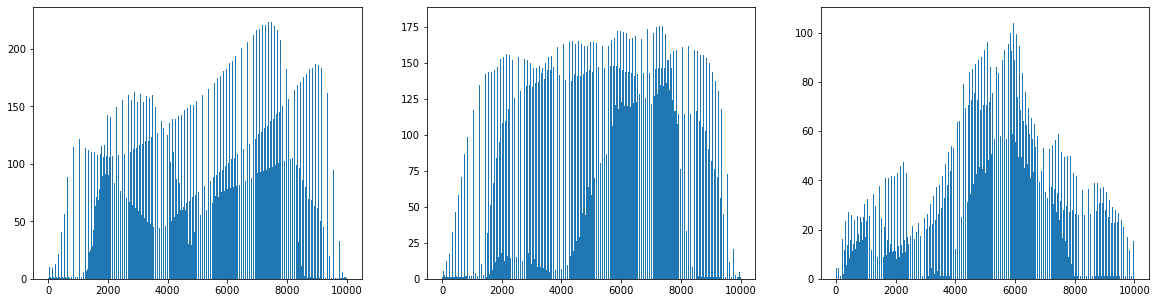

In [14]:
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].bar(range(10000), np.mean(apple, axis = 0))
axs[1].bar(range(10000), np.mean(pineapple, axis = 0))
axs[2].bar(range(10000), np.mean(banana, axis = 0))
plt.show()

순서대로 사과, 파인애플, 바나나 그래프이다. 3개의 그래프를 보면 과일마다 값이 높은 구간이 다르다. 사과는 사진 아래쪽으로 갈수록 값이 높아지고, 파인애플 그래프는 비교적 고르면서 높다. 바나나는 중앙의 픽셀값이 높다.  
  
픽셀 평균값을 100 x 100 크기로 바꿔서 이미지처럼 출력하여 위 그래프와 비교하면 더 좋다. 픽셀을 평균 낸 이미지를 모든 사진을 합쳐 놓은 대표 이미지로 생각할 수 있다.

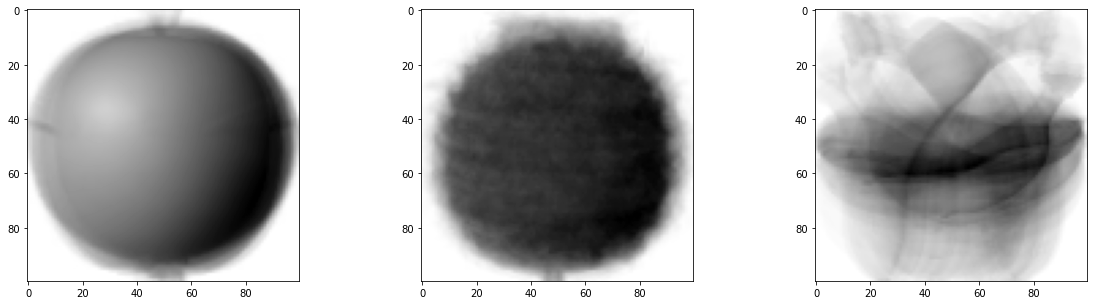

In [15]:
apple_mean = np.mean(apple, axis = 0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis = 0).reshape(100, 100)
banana_mean = np.mean(banana, axis = 0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize = (20,5))
axs[0].imshow(apple_mean, cmap = 'gray_r')
axs[1].imshow(pineapple_mean, cmap = 'gray_r')
axs[2].imshow(banana_mean, cmap = 'gray_r')
plt.show()

세 과일은 픽셀 위치에 따라 값의 차이가 크게 난다. 따라서 이 대표 이미지와 가까운 사진을 골라낸다면 사과, 파인애플, 바나나를 구분할 수 있을 것이다.

### 평균값과 가까운 사진 고르기  
사과 사진의 평균값인 apple_mean과 가장 가까운 사진을 골라보자. 3장에서 봤던 절댓값 오차를 사용한다. fruits 배열에 있는 모든 샘플에서 apple_mean을 뺀 절댓값의 평균을 계산하면 된다.  
  
절댓값 부터 계산해 보자. 넘파이 abs() 함수는 절댓값을 계산하는 함수이다. 예를 들어 np.abs(-1)은 1을 반환한다. 배열을 입력하면 모든 원소의 절댓값을 계산하여 입력과 동일한 크기의 배열을 반환한다. 이 함수는 np.absolute() 함수의 다른 이름이다.  
  
다음 코드에서 abs_diff는 (300, 100, 100) 크기의 배열이다. 따라서 각 샘플에 대한 평균을 구하기 위해 axis에 두 번째, 세 번째 차원을 모두 지정하였다. 이렇게 계산한 abs_mean은 각 샘플의 오차 평균이므로 크기가 (300,)인 1차원 배열이다.

In [16]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis = (1,2))
print(abs_mean.shape)

(300,)


그다음, 이 값이 가장 작은 순서대로 100개를 골라 보자. 즉 apple_mean과 오차가 가장 작은 샘플 100개를 고르는 것이다. np.argsort() 함수는 작은 것에서 큰 순서대로 나열한 abs_mean 배열의 인덱스를 반환한다. 이 인덱스 중에서 처음 100개를 선택해 10 x 10 격자로 이루어진 그래프를 그리자.

[33 48 70 57 87 12 78 59  1 74 86 38 50 92 69 27 68 30 66 24 76 98 15 84
 47 90  3 94 53 23 14 71 32  7 73 36 55 77 21 10 17 39 99 95 11 35 65  6
 61 22 56 89  2 13 80  0 97  4 58 34 40 43 75 82 54 16 31 49 93 37 63 64
 41 28 67 25 96  8 83 46 19 79 72  5 85 29 20 60 81  9 45 51 88 62 91 26
 52 18 44 42]


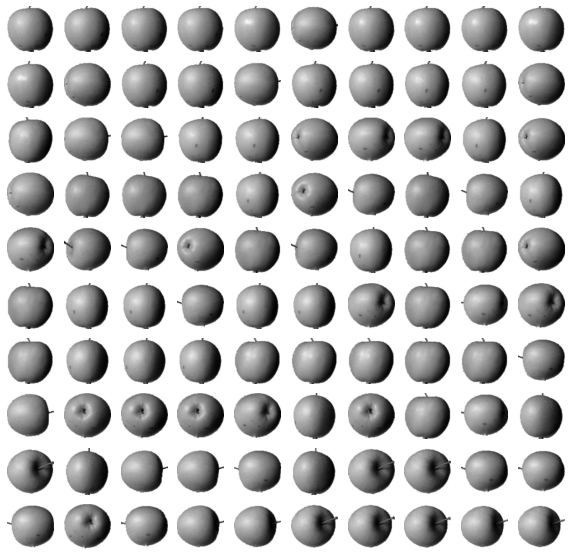

In [31]:
apple_index = np.argsort(abs_mean)[:100]
print(apple_index) ## 역시나 처음 0~99까지의 인덱스만 들어있다.
fig, axs = plt.subplots(10, 10, figsize = (10,10))
for i in range(10):
    for j in range(10):
        axs[i,j].imshow(fruits[apple_index[i*10 + j]], cmap = 'gray_r')
        axs[i,j].axis('off')
plt.show()

apple_mean과 가장 가까운 사진 100개가 모두 사과이다. 위의 코드를 살펴보자.  
  
먼저 subplots() 함수로 10 x 10, 총 100개의 서브 그래프를 만들었다. 그래프가 많기 때문에 전체 그래프의 크기를 figsize = (10,10)으로 조금 크게 지정하였다.  
  
그다음 2중 for 반복문을 순회하면서 10개의 행과 열에 이미지를 출력한다. axs는 (10,10) 크기의 2차원 배열이므로 i, j 두 첨자를 사용하여 서브 그래프 위치를 지정한다. 또 깔끔하게 이미지만 그리기 위해 axis('off')를 사용하여 좌표축을 그리지 않았다.

흑백 사진에 있는 픽셀값을 사용해 과일 사진을 모으는 작업을 해 보았다. 이렇게 비슷한 샘플끼리 그룹으로 모으는 작업을 **군집(clustering)**이라고 한다. 군집은 대표적인 비지도 학습 작업 중 하나이다. 군집 알고리즘에서 만든 그룹을 **클러스터(cluster)**라고 부른다.  
  
하지만 이미 사과, 파인애플, 바나나가 있다는 것을 알고 있었다. 즉 타깃값을 알고 있었기 때문에 사과, 파인애플, 바나나의 사진 평균값을 계산해서 가장 가까운 과일을 찾을 수 있었다.  
실제 비지도 학습에서는 타깃값을 모르기 때문에 이처럼 샘플의 평균값을 미리 구할 수 없다.  
  
타깃값을 모르면서 어떻게 세 과일의 평균값을 찾을 수 있을까? 2절에서 배울 k-평균 알고리즘이 이 문제를 해결해 준다.

- 비지도 학습  
    머신러닝의 한 종류로 훈련 데이터에 타깃이 없다. 타깃이 없기 때문에 외부의 도움 없이 스스로 유용한 무언가를 학습해야 한다. 대표적인 비지도 학습 작업은 군집, 차원 축소 등 이다.  
  

- 히스토그램  
    구간별로 값이 발생한 빈도를 그래프로 표시한 것이다. 보통 x축이 값의 구간(계급)이고 y축은 발생 빈도(도수)이다.  
  

- 군집  
    비슷한 샘플끼리 하나의 그룹으로 모으는 대표적인 비지도 학습 작업이다. 군집 알고리즘으로 모은 샘플 그룹을 클러스터라고 부른다.